In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('ushape.csv')

In [22]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


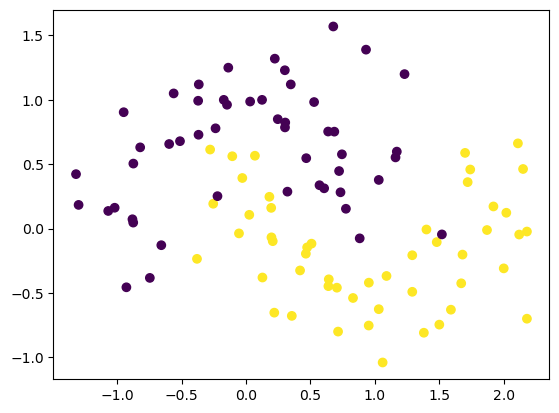

In [23]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [24]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# HE Init

In [26]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/home/ad/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.get_weights()

[array([[ 0.6536677 ,  0.45393065,  0.09239285,  0.5401462 ,  0.27053934,
          0.02804271, -1.7867126 ,  0.5218093 ,  1.1128302 ,  1.7298129 ],
        [ 0.31065395, -2.0532238 , -0.37017393,  0.47893897,  1.615083  ,
         -1.7035857 , -0.23592745,  1.668353  ,  0.1279022 ,  0.38394284]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.27688125, -0.25974977, -0.10629588, -0.58991355,  0.800457  ,
         -0.08939672,  0.5695854 ,  0.19206138,  0.43254745,  0.7659431 ],
        [-0.38836265,  0.79613304, -0.54861736, -0.07878218,  0.17714761,
         -0.5557334 ,  0.07363933, -0.14917345, -0.40762118, -0.0417955 ],
        [-0.23599   ,  0.2546988 ,  0.70443213, -0.19927621, -0.04611288,
          0.4791316 , -0.08891705, -0.15991028,  0.32697204, -0.2601861 ],
        [ 0.10720941,  0.28001124, -0.88851553,  0.49361163, -0.12226547,
          0.09777669, -0.8854361 , -0.12551232, -0.09046484, -0.3875069 ],
        [ 0.08224

In [28]:
initial_weights = model.get_weights()

# Xavier

In [29]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [30]:
#model.get_weights(initial_weights)

In [31]:
model.get_weights()

[array([[ 0.6536677 ,  0.45393065,  0.09239285,  0.5401462 ,  0.27053934,
          0.02804271, -1.7867126 ,  0.5218093 ,  1.1128302 ,  1.7298129 ],
        [ 0.31065395, -2.0532238 , -0.37017393,  0.47893897,  1.615083  ,
         -1.7035857 , -0.23592745,  1.668353  ,  0.1279022 ,  0.38394284]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.27688125, -0.25974977, -0.10629588, -0.58991355,  0.800457  ,
         -0.08939672,  0.5695854 ,  0.19206138,  0.43254745,  0.7659431 ],
        [-0.38836265,  0.79613304, -0.54861736, -0.07878218,  0.17714761,
         -0.5557334 ,  0.07363933, -0.14917345, -0.40762118, -0.0417955 ],
        [-0.23599   ,  0.2546988 ,  0.70443213, -0.19927621, -0.04611288,
          0.4791316 , -0.08891705, -0.15991028,  0.32697204, -0.2601861 ],
        [ 0.10720941,  0.28001124, -0.88851553,  0.49361163, -0.12226547,
          0.09777669, -0.8854361 , -0.12551232, -0.09046484, -0.3875069 ],
        [ 0.08224

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5250 - loss: 0.8056 - val_accuracy: 0.5500 - val_loss: 0.7944
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5375 - loss: 0.7809 - val_accuracy: 0.5500 - val_loss: 0.7663
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5375 - loss: 0.7573 - val_accuracy: 0.5500 - val_loss: 0.7406
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5500 - loss: 0.7342 - val_accuracy: 0.5500 - val_loss: 0.7165
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5500 - loss: 0.7160 - val_accuracy: 0.5500 - val_loss: 0.6926
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5750 - loss: 0.6953 - val_accuracy: 0.6000 - val_loss: 0.6697
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5875 - loss: 0.6765 - val_accuracy: 0.6000 - val_loss: 0.6489
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6125 - loss: 0.6611 - val_accuracy: 0.6000 - val_loss

In [34]:
model.get_weights()

[array([[ 0.5930065 ,  0.6053248 ,  0.20831063,  0.5915819 ,  0.19416754,
         -0.00295992, -1.9431763 ,  0.40131772,  1.0455856 ,  1.7037023 ],
        [ 0.38576853, -2.1155276 , -0.5111331 ,  0.4045821 ,  1.7696311 ,
         -1.6786324 , -0.20136544,  1.785179  ,  0.18340218,  0.28223383]],
       dtype=float32),
 array([-0.06140504,  0.14548194,  0.11036761, -0.04585534, -0.04854988,
        -0.03879138, -0.04139729,  0.00511916, -0.02680239, -0.16182837],
       dtype=float32),
 array([[ 3.66664946e-01, -1.79682001e-01, -1.06295876e-01,
         -5.89913547e-01,  7.49242246e-01, -1.28995344e-01,
          6.50669158e-01,  3.21506083e-01,  4.17126119e-01,
          6.69220686e-01],
        [-2.91835964e-01,  9.02967811e-01, -5.48617363e-01,
         -1.54373810e-01,  1.12145618e-01, -4.94519949e-01,
          2.07503527e-01, -8.22948106e-03, -5.07172227e-01,
         -1.11328036e-01],
        [-9.54432413e-02,  3.85295868e-01,  7.04432130e-01,
         -2.88484782e-01, -1.21643

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step


<Axes: >

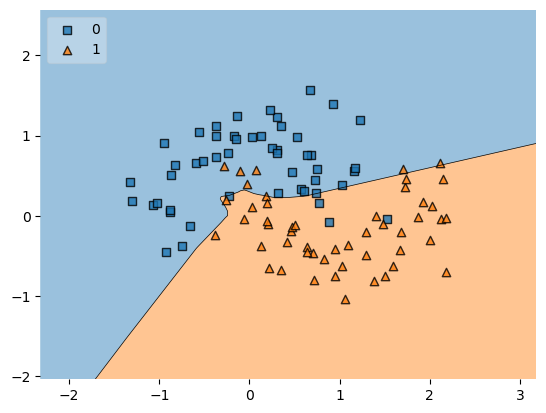

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)